# A Simple Guide to Data Visualization Elements

It is intended to gather different visualization elements (primarily diagrams/plots) in this notebook. 


The data: I use public datasets which are inbuilt in modules seaborn, scikit-learn, and statsmodels. 


If you are looking for a PDF version, maybe the best option is to open this notebook, run cells, then export to PDF.

**Requirements:** 
- packages: pandas, numpy, matplotlib, scipy, scikit-learn, seaborn, statsmodels, networkx, squarify, nbformat

        Install with: pip install pandas numpy matplotlib scipy scikit-learn seaborn statsmodels networkx squarify nbformat
- Environment: Jupyter notebook env.


In [1]:

# Setup: imports and dataset loading (real datasets)

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
from sklearn import datasets as sk_datasets
import statsmodels.api as sm
import networkx as nx
import squarify
from pandas.plotting import scatter_matrix, parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
# ignore warnings
warnings.filterwarnings("ignore")


In [ ]:
def show_and_save(fig, fname=None, dpi=150): # For higher resolution images pass a larger dpi please
    if fname:
        fig.savefig(fname, bbox_inches='tight', dpi=dpi)
    plt.show()
    plt.close(fig)


In [3]:

# Load real public datasets
# 1) Titanic (mix of categorical, numeric, ordinal, kind of)
titanic = sns.load_dataset('titanic')  # contains sex, age, fare, class, embarked, alive
# 2) Tips (restaurant) (categorical + numeric + time)
tips = sns.load_dataset('tips')
# 3) Flights (time series, monthly passengers)
flights = sns.load_dataset('flights')
# 4) Diamonds (large mixed numeric + categorical)
try:
    diamonds = sns.load_dataset('diamonds')
except Exception:
    diamonds = None
# 5) Iris (classic numeric multi)
iris = sk_datasets.load_iris(as_frame=True).frame
iris['species'] = sk_datasets.load_iris().target_names[sk_datasets.load_iris().target]
# 6) Diabetes (regression numeric)
diabetes = sk_datasets.load_diabetes(as_frame=True).frame
# 7) mtcars from statsmodels (classic mixed)
mtcars = sm.datasets.get_rdataset('mtcars').data
# 8) A mixed "real-like" composite dataframe: use titanic + tips merged minimally for demonstration
# (we will not truly merge row-wise; we'll use them separately where appropriate)
print("Datasets ready: titanic, tips, flights, diamonds (optional), iris, diabetes, mtcars")


Datasets ready: titanic, tips, flights, diamonds (optional), iris, diabetes, mtcars


## Univariate visualizations (real datasets)
Each example uses a real dataset loaded in previous step, and includes some short use-cases with it.

### Bar chart , categorical counts (from TITANIC: sex)

Use when you want raw counts or simple category comparisons. Especcially, avoid pie if many categories.

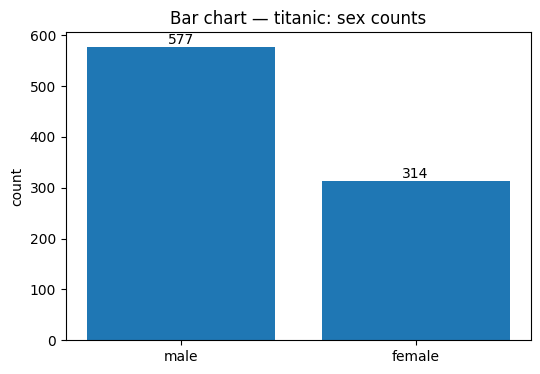

In [ ]:

counts = titanic['sex'].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(counts.index.astype(str), counts.values)
ax.set_title('Bar chart , titanic: sex counts')
ax.set_ylabel('count')
for i,v in enumerate(counts.values):
    ax.text(i, v+5, str(v), ha='center')
show_and_save(fig, fname='plots/univariate_bar_titanic_sex.png')


### Pie chart , proportions (from TIPS: day)

Pie charts are fine when there are very few categories and you want proportions for presentation.

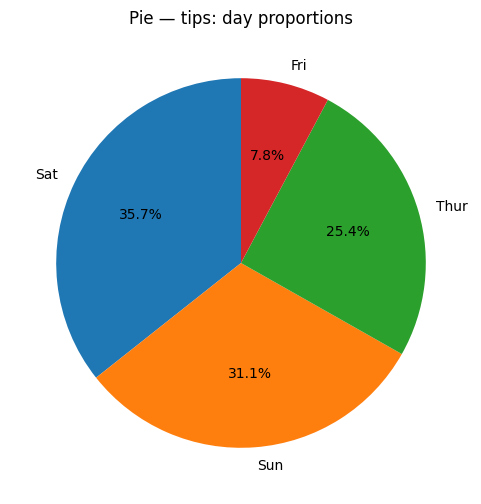

In [ ]:

day_counts = tips['day'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Pie , tips: day proportions')
show_and_save(fig, fname='plots/univariate_pie_tips_day.png')


### Histogram , numeric distribution (from DIAMONDS: price)

Good to check skewness, multimodality, outliers. We also get a better image of data distribution of a feature. 

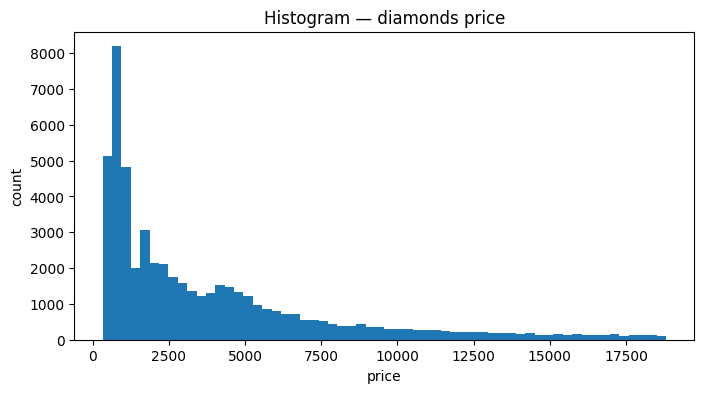

In [ ]:

if diamonds is None:
    print("Diamonds dataset not available in seaborn - skipping histogram example.")
else:
    fig, ax = plt.subplots(figsize=(8,4))
    ax.hist(diamonds['price'], bins=60)
    ax.set_title('Histogram , diamonds price')
    ax.set_xlabel('price'); ax.set_ylabel('count')
    show_and_save(fig, fname='plots/univariate_hist_diamonds_price.png')


### Boxplot , numeric summary and outliers (rfrom TITANIC: fare)

Quick visual summary: median, IQR, whiskers, outliers. It gives a good image of distribution in one single dimension, so we can use the second dimension for different features (categorical). Also a good idea is to draw one box for each value of a categorical feature.

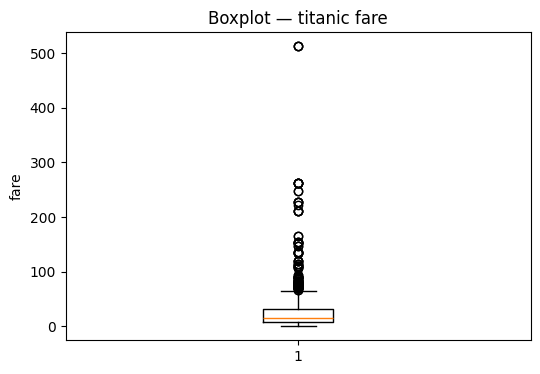

In [ ]:

fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot(titanic['fare'].dropna())
ax.set_title('Boxplot , titanic fare')
ax.set_ylabel('fare')
show_and_save(fig, fname='plots/univariate_box_titanic_fare.png')


### Violin plot , density and summary (TIPS: total_bill)

Shows full distribution shape and common values.

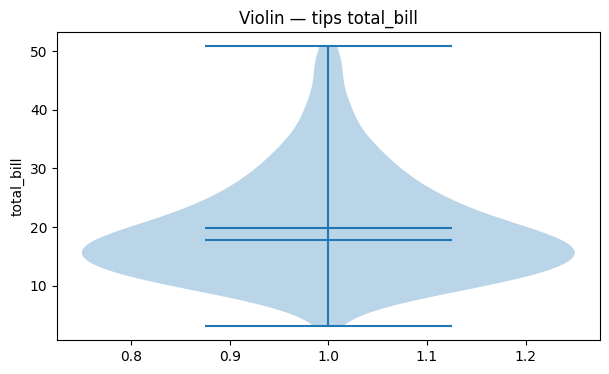

In [ ]:

fig, ax = plt.subplots(figsize=(7,4))
ax.violinplot(tips['total_bill'], showmeans=True, showmedians=True)
ax.set_title('Violin , tips total_bill')
ax.set_ylabel('total_bill')
show_and_save(fig, fname='plots/univariate_violin_tips_totalbill.png')


### ECDF , empirical cumulative distribution (from FLIGHTS: passengers)

Useful for comparing quantiles and non-parametric views of distribution.

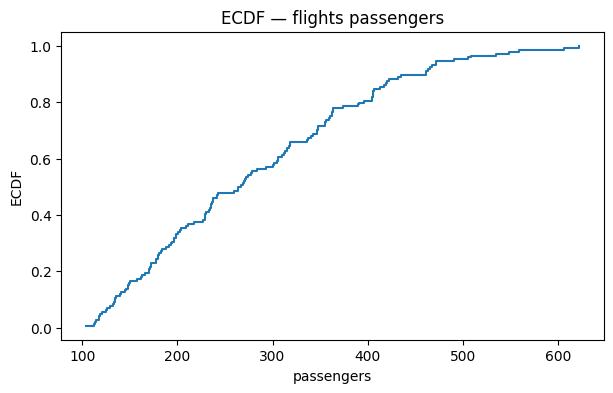

In [ ]:

x = np.sort(flights['passengers'].values)
y = np.arange(1, len(x)+1) / len(x)
fig, ax = plt.subplots(figsize=(7,4))
ax.step(x, y, where='post')
ax.set_title('ECDF , flights passengers')
ax.set_xlabel('passengers')
ax.set_ylabel('ECDF')
show_and_save(fig, fname='plots/univariate_ecdf_flights_passengers.png')


### Discrete counts , integer categories (from MTCARS: cyl)

Use bar for small-range integer-valued variables.

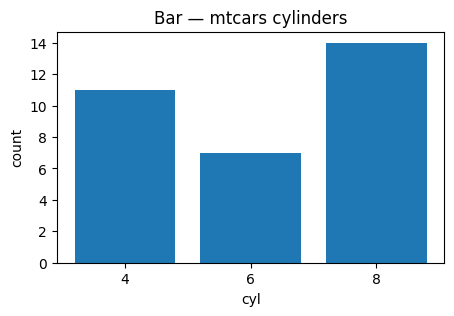

In [ ]:

cyl_counts = mtcars['cyl'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(cyl_counts.index.astype(str), cyl_counts.values)
ax.set_title('Bar , mtcars cylinders')
ax.set_xlabel('cyl'); ax.set_ylabel('count')
show_and_save(fig, fname='plots/univariate_bar_mtcars_cyl.png')


## Bivariate visualizations , all major variable-type pairs
We show several representative plots for each pair type, using the loaded datasets.

### Categorical vs Categorical , TITANIC class vs embarked (heatmap & stacked bar)

Use crosstabs, stacked bars, heatmaps to inspect co-occurrence or association.

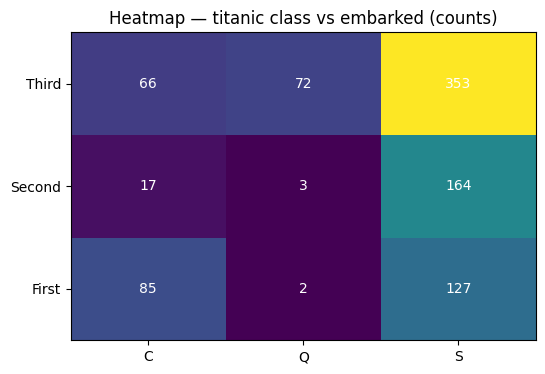

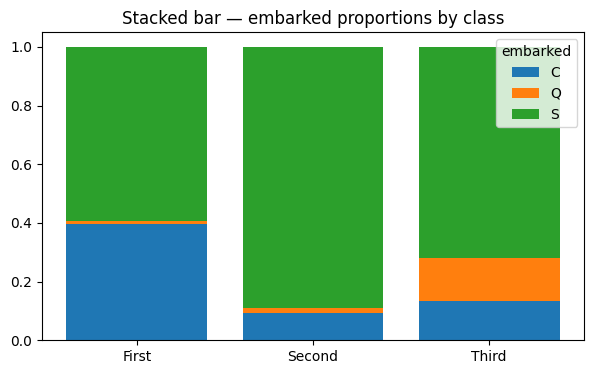

In [ ]:

ct = pd.crosstab(titanic['class'], titanic['embarked'])
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(ct.fillna(0).values, origin='lower', aspect='auto')
ax.set_xticks(range(len(ct.columns))); ax.set_xticklabels(ct.columns)
ax.set_yticks(range(len(ct.index))); ax.set_yticklabels(ct.index)
ax.set_title('Heatmap , titanic class vs embarked (counts)')
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        ax.text(j, i, int(ct.iloc[i,j]) if not np.isnan(ct.iloc[i,j]) else 0, ha='center', va='center', color='w')
show_and_save(fig, fname='plots/bivar_heatmap_titanic_class_embarked.png')

# stacked bar proportions
ct_prop = ct.div(ct.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(7,4))
left = np.zeros(ct_prop.shape[0])
labels = ct_prop.index
for col in ct_prop.columns:
    ax.bar(labels, ct_prop[col], bottom=left, label=str(col))
    left += ct_prop[col]
ax.legend(title='embarked')
ax.set_title('Stacked bar , embarked proportions by class')
show_and_save(fig, fname='plots/bivar_stackedbar_titanic_class_embarked.png')


### Categorical vs Numeric , TIPS day vs total_bill (box, violin, bar-of-means)

Compare distributions across categories using box/violin; bar-of-means for central tendency.

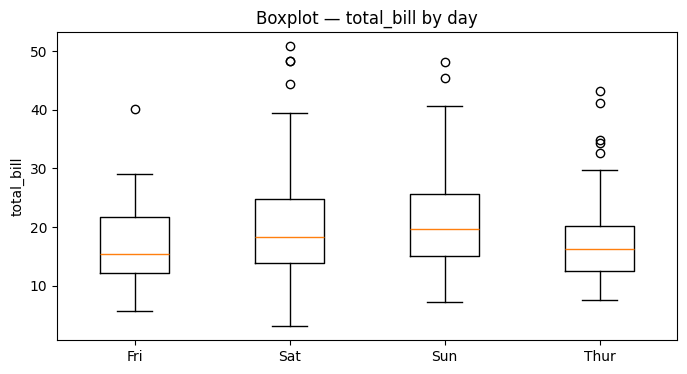

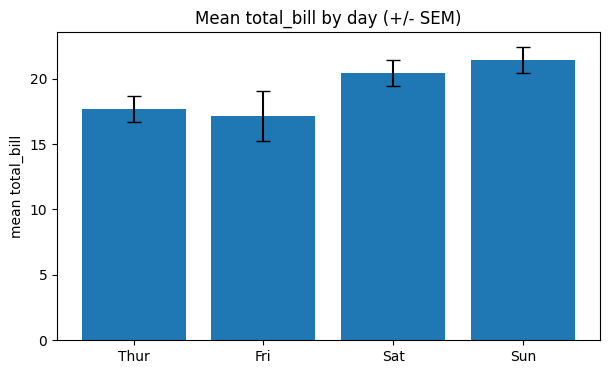

In [ ]:

# Box
fig, ax = plt.subplots(figsize=(8,4))
groups = [tips.loc[tips['day']==d, 'total_bill'].dropna() for d in sorted(tips['day'].unique())]
ax.boxplot(groups, labels=sorted(tips['day'].unique()))
ax.set_title('Boxplot , total_bill by day')
ax.set_ylabel('total_bill')
show_and_save(fig, fname='plots/bivar_box_tips_totalbill_by_day.png')

# Bar of means + stderr
means = tips.groupby('day')['total_bill'].mean()
sems = tips.groupby('day')['total_bill'].sem()
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(means.index.astype(str), means.values, yerr=sems.values, capsize=5)
ax.set_title('Mean total_bill by day (+/- SEM)')
ax.set_ylabel('mean total_bill')
show_and_save(fig, fname='plots/bivar_barmeans_tips_totalbill_by_day.png')


### Ordinal-like vs Numeric , TITANIC class (ordered) vs age

If you have a true ordinal scale, preserve order when plotting comparisons.

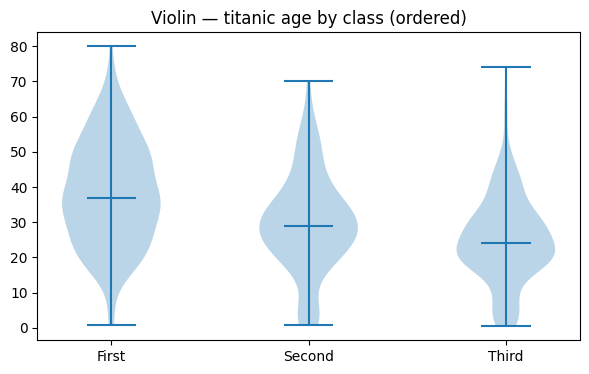

In [ ]:

# define order for class (First, Second, Third)
order = ['First', 'Second', 'Third']
fig, ax = plt.subplots(figsize=(7,4))
data = [titanic.loc[titanic['class']==o, 'age'].dropna() for o in order]
ax.violinplot(data, showmedians=True)
ax.set_xticks(range(1,len(order)+1)); ax.set_xticklabels(order)
ax.set_title('Violin , titanic age by class (ordered)')
show_and_save(fig, fname='plots/bivar_violin_titanic_age_by_class.png')


### Numeric vs Numeric , scatter, hexbin, density contour, regression line

Use scatter for moderate sizes; hexbin or 2D density for large points; overlay regression to show trend.

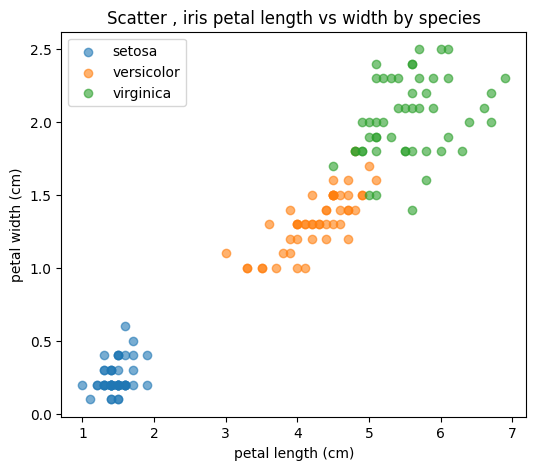

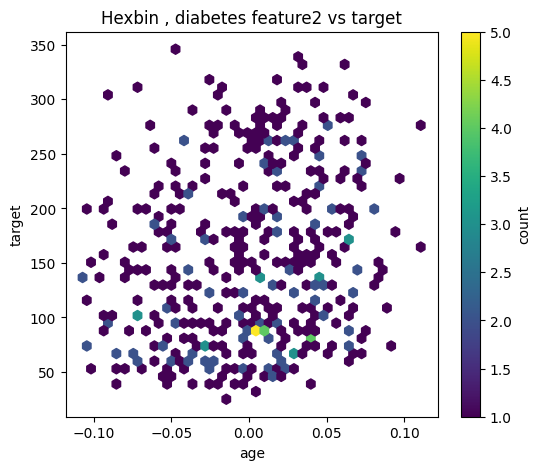

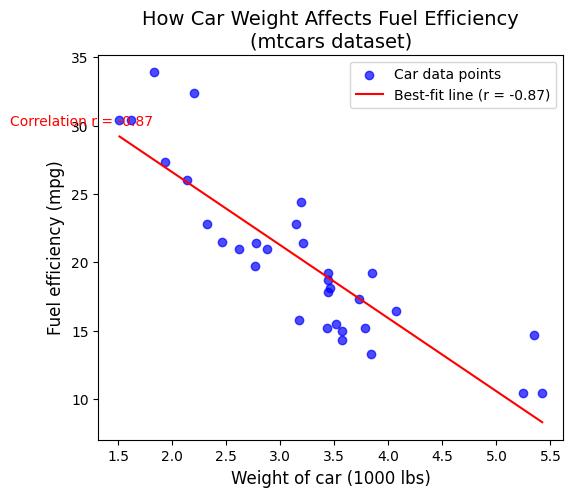

In [ ]:

# Iris scatter: petal_length vs petal_width colored by species
fig, ax = plt.subplots(figsize=(6,5))
for sp in iris['species'].unique():
    sub = iris[iris['species']==sp]
    ax.scatter(sub['petal length (cm)'], sub['petal width (cm)'], alpha=0.6, label=sp)
ax.set_xlabel('petal length (cm)'); ax.set_ylabel('petal width (cm)')
ax.legend(); ax.set_title('Scatter , iris petal length vs width by species')
show_and_save(fig, fname='plots/bivar_scatter_iris_petals.png')

# Hexbin: diabetes feature 0 vs target (dense)
fig, ax = plt.subplots(figsize=(6,5))
hb = ax.hexbin(diabetes.iloc[:,0], diabetes['target'], gridsize=40, mincnt=1)
plt.colorbar(hb, ax=ax, label='count')
ax.set_xlabel(diabetes.columns[0]); ax.set_ylabel('target')
ax.set_title('Hexbin , diabetes feature2 vs target')
show_and_save(fig, fname='plots/bivar_hexbin_diabetes_feat0_target.png')

# ---------------------------------------- 

# Scatter + regression (age vs spend_est using composite real-like titanic not appropriate - use mtcars mpg vs wt)
fig, ax = plt.subplots(figsize=(6, 5))

# Extract data
x = mtcars['wt']  # car weight (1000 lbs)
y = mtcars['mpg']  # miles per gallon

# Scatter plot
ax.scatter(x, y, label='Car data points', color='blue', alpha=0.7)

# Regression line
slope, intercept, r, p, stderr = stats.linregress(x, y)
xs = np.array([x.min(), x.max()])
ys = intercept + slope * xs
ax.plot(xs, ys, color='red', label=f'Best-fit line (r = {r:.2f})')
ax.set_xlabel('Weight of car (1000 lbs)', fontsize=12)
ax.set_ylabel('Fuel efficiency (mpg)', fontsize=12)
ax.set_title('How Car Weight Affects Fuel Efficiency\n(mtcars dataset)', fontsize=14)
ax.legend()

# Show correlation info on the plot
ax.text(0.5, 30, f'Correlation r = {r:.2f}', color='red', fontsize=10)

# Save and show
show_and_save(fig, fname='plots/bivar_scatter_reg_mtcars_mpg_wt.png')



### Time series , FLIGHTS monthly passengers (line, seasonal decomposition)

Plot trend and check seasonality.

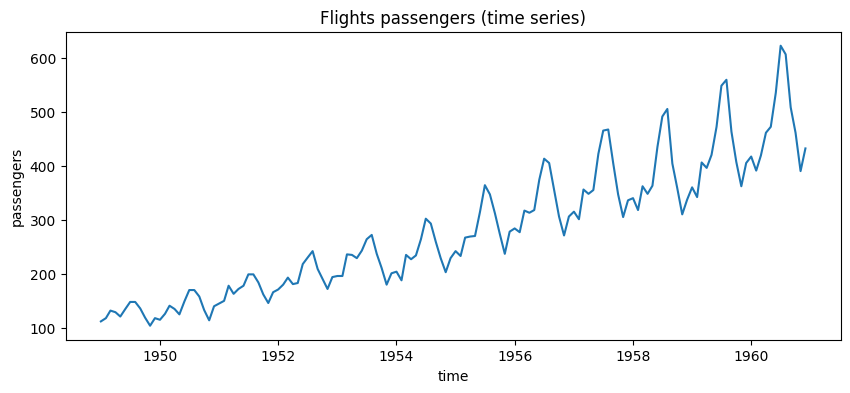

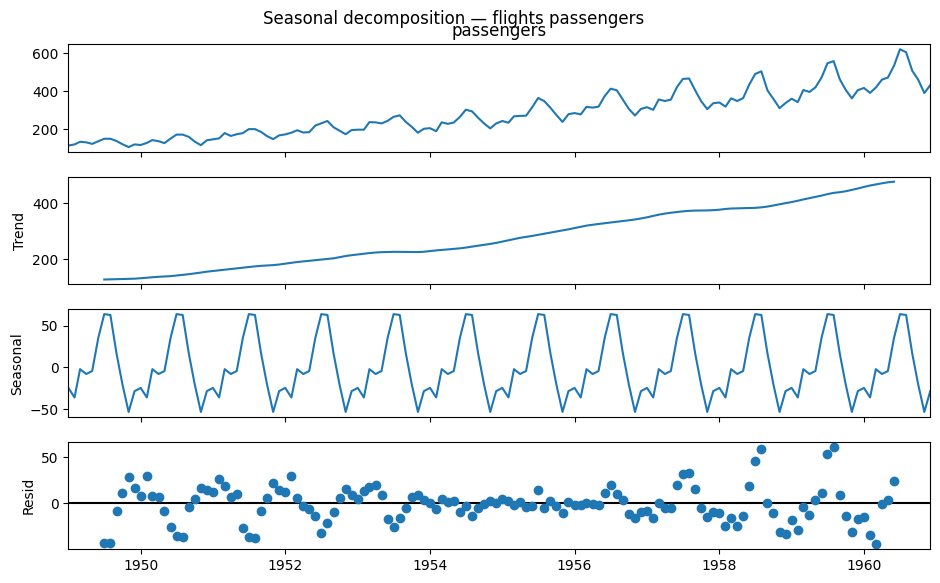

In [ ]:

# Line plot
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str)), flights['passengers'])
ax.set_title('Flights passengers (time series)')
ax.set_xlabel('time'); ax.set_ylabel('passengers')
show_and_save(fig, fname='plots/bivar_timeseries_flights_line.png')

# Seasonal decomposition 
try:
    series = flights.set_index(pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str)))['passengers']
    res = sm.tsa.seasonal_decompose(series, model='additive', period=12)
    fig = res.plot()
    fig.set_size_inches(10,6)
    plt.suptitle('Seasonal decomposition , flights passengers')
    plt.savefig('plots/bivar_seasonal_decompose_flights.png', bbox_inches='tight', dpi=150)
    plt.show(); plt.close()
except Exception as e:
    print("Seasonal decomposition failed:", e)


### Grouped categorical vs Numeric , TIPS smoker + sex vs total_bill (grouped bar + violin split)

Compare across two categorical factors.

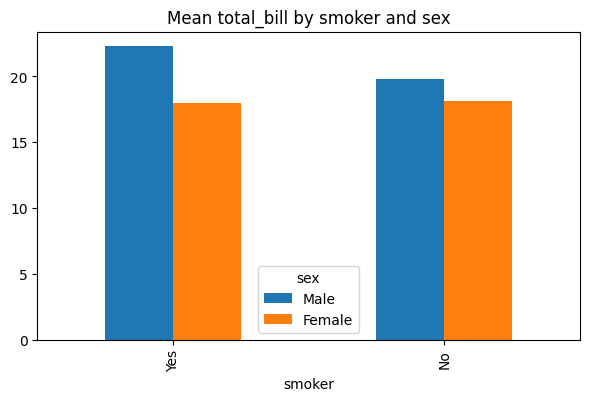

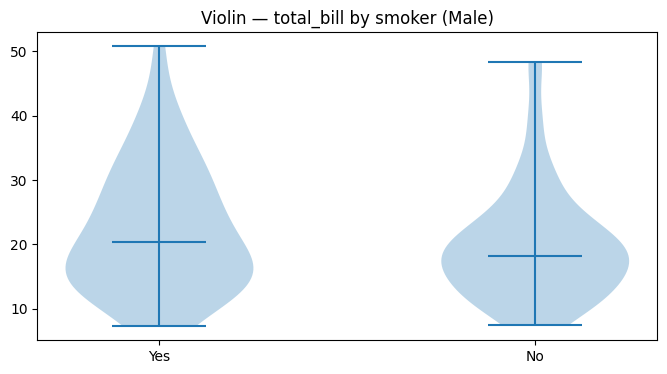

In [ ]:

# grouped mean bars
grouped = tips.groupby(['smoker','sex'])['total_bill'].mean().unstack()
fig, ax = plt.subplots(figsize=(7,4))
grouped.plot(kind='bar', ax=ax)
ax.set_title('Mean total_bill by smoker and sex')
show_and_save(fig, fname='plots/bivar_groupedbar_tips_totalbill_smoker_sex.png')

# violin split by smoker
fig, ax = plt.subplots(figsize=(8,4))
smoker_vals = ['Yes','No']
data = [tips[(tips['smoker']==s) & (tips['sex']=='Male')]['total_bill'] for s in smoker_vals]
ax.violinplot(data, positions=[1,2], showmedians=True)
ax.set_xticks([1,2]); ax.set_xticklabels(smoker_vals)
ax.set_title('Violin , total_bill by smoker (Male)')
show_and_save(fig, fname='plots/bivar_violin_tips_totalbill_smoker_male.png')


## Multivariate & (a bit more) advanced visualizations
Pairplots, correlation matrices, 3D scatter, treemap, sunburst (illustrative), network graphs, parallel coordinates, ridge plots.

### Pairplot / scatter matrix , IRIS

Good for quick multivariate exploration of numeric variables.

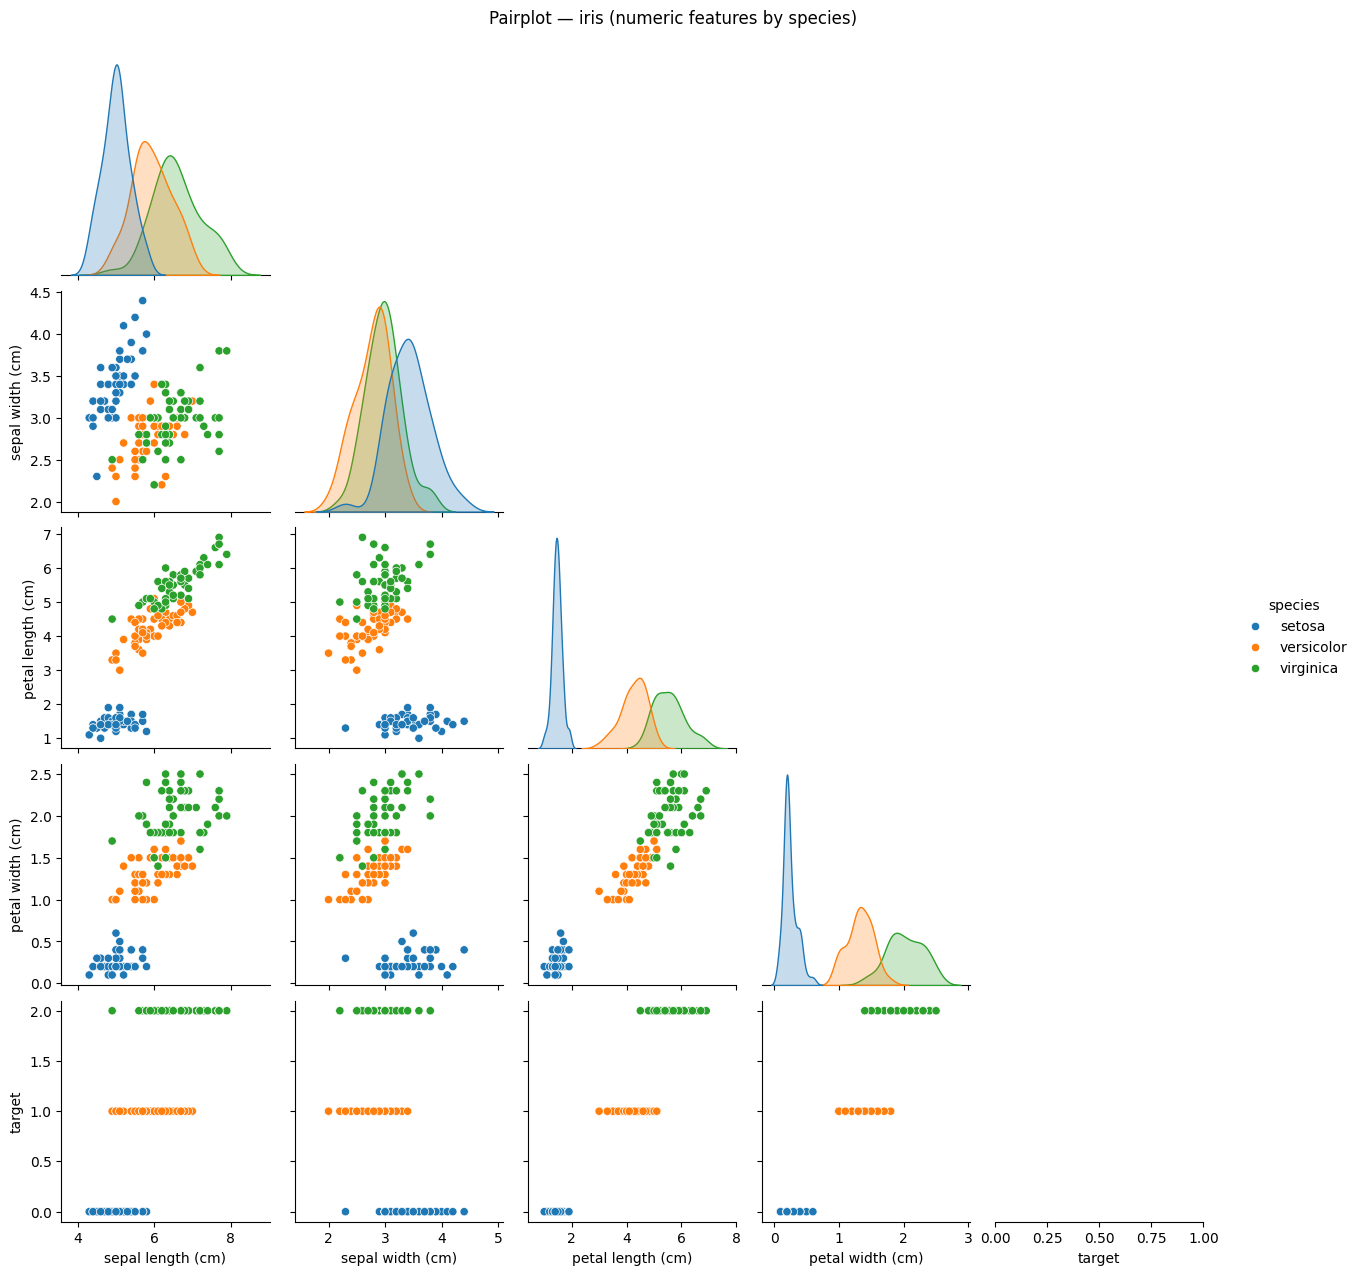

In [ ]:

# Pairplot (seaborn)
sns.pairplot(iris, hue='species', corner=True)
plt.suptitle('Pairplot , iris (numeric features by species)', y=1.02)
plt.savefig('plots/multi_pairplot_iris.png', bbox_inches='tight', dpi=150)
plt.show(); plt.close()


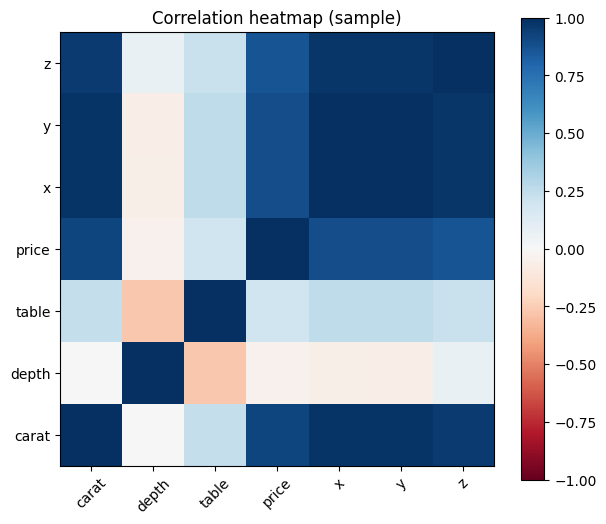

In [51]:

# Correlation heatmap (numeric features)
if diamonds is not None:
    num = diamonds.select_dtypes(include='number').sample(n=min(1000,len(diamonds)), random_state=1)
    corr = num.corr()
else:
    corr = mtcars.corr()
fig, ax = plt.subplots(figsize=(7,6))
im = ax.imshow(corr.values, origin='lower', cmap='RdBu', vmin=-1, vmax=1)
ax.set_xticks(range(len(corr.columns))); ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticks(range(len(corr.index))); ax.set_yticklabels(corr.index)
plt.colorbar(im, ax=ax)
ax.set_title('Correlation heatmap (sample)')
show_and_save(fig, fname='plots/multi_corr_heatmap_sample.png')


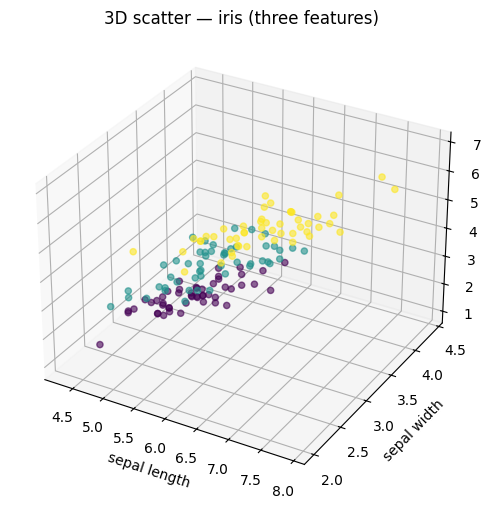

In [ ]:

# 3D scatter example (iris)
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], iris['petal length (cm)'],
           c=pd.Categorical(iris['species']).codes, cmap='viridis', alpha=0.6)
ax.set_xlabel('sepal length'); ax.set_ylabel('sepal width'); ax.set_zlabel('petal length')
ax.set_title('3D scatter , iris (three features)')
show_and_save(fig, fname='plots/multi_3d_scatter_iris.png')


I like parallel coordinates very much as they let you look at data or a subset of it with all features considered in the same place. 

If the quantities are very different between features, it might not work as expected since data should be normalized before using this type of graph.

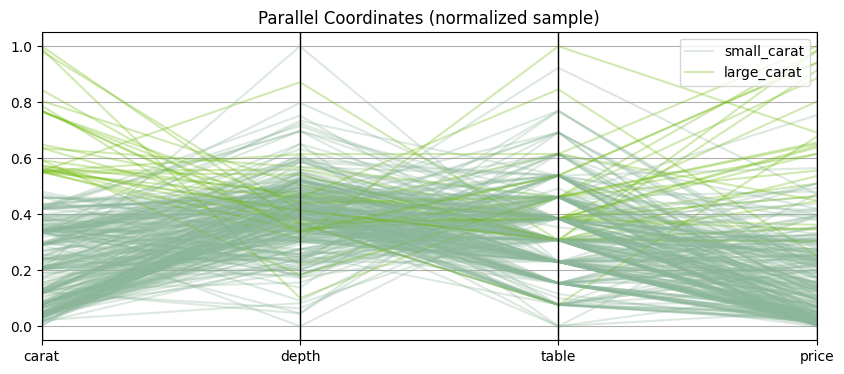

In [ ]:

# Parallel coordinates , normalized sample
if diamonds is not None:
    sample = diamonds.sample(300, random_state=1)
    sample = sample[['carat','depth','table','price']].dropna()
    sample_norm = (sample - sample.min())/(sample.max()-sample.min())
    sample_norm['group'] = (sample_norm['carat']>0.5).map({True:'large_carat', False:'small_carat'})
else:
    sample = mtcars[['mpg','hp','wt','qsec']].copy()
    sample_norm = (sample - sample.min())/(sample.max()-sample.min())
    sample_norm['group'] = (mtcars['cyl']>6).map({True:'many_cyl', False:'few_cyl'})

fig, ax = plt.subplots(figsize=(10,4))
parallel_coordinates(sample_norm, 'group', alpha=0.3, ax=ax)
ax.set_title('Parallel Coordinates (normalized sample)')
show_and_save(fig, fname='plots/multi_parallel_coordinates_sample.png')


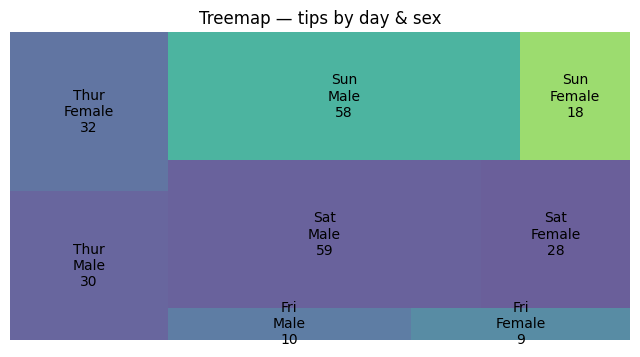

In [ ]:

# Treemap , tips: area proportion of day-sex groups
grouped = tips.groupby(['day','sex']).size().reset_index(name='count')
labels = grouped.apply(lambda r: f"{r['day']}\n{r['sex']}\n{r['count']}", axis=1).tolist()
sizes = grouped['count'].values.tolist()
fig, ax = plt.subplots(figsize=(8,4))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, ax=ax)
ax.axis('off')
ax.set_title('Treemap , tips by day & sex')
show_and_save(fig, fname='plots/multi_treemap_tips_day_sex.png')


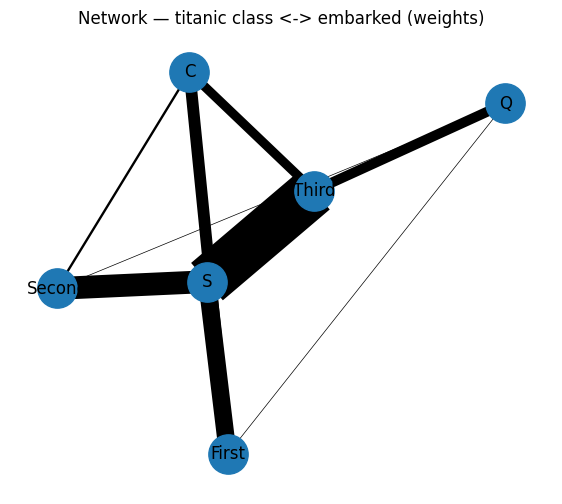

In [ ]:

# Network graph illustrative: titanic class <-> embarked weighted edges
G = nx.Graph()
ct = pd.crosstab(titanic['class'], titanic['embarked'])
for edu in ct.index:
    for emb in ct.columns:
        val = ct.loc[edu, emb]
        if not np.isnan(val) and val>0:
            G.add_edge(edu, emb, weight=val)
pos = nx.spring_layout(G, seed=3)
fig, ax = plt.subplots(figsize=(7,6))
weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=800, width=[max(0.5,w/10) for w in weights], ax=ax)
ax.set_title('Network , titanic class <-> embarked (weights)')
show_and_save(fig, fname='plots/multi_network_titanic_class_embarked.png')


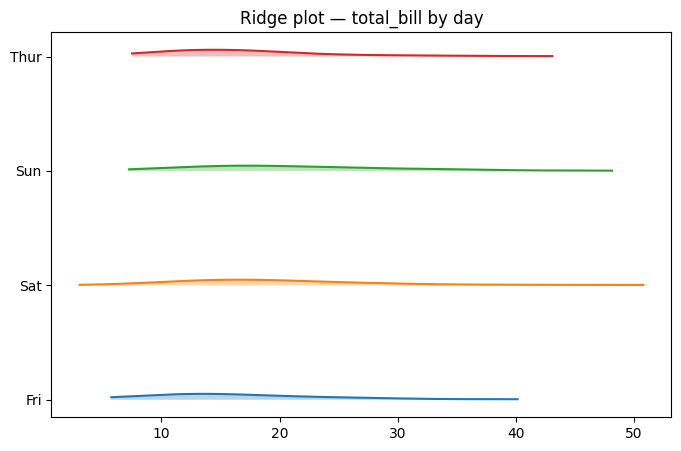

In [ ]:

# Ridge plot: stacked KDEs for 'total_bill' by day
days = sorted(tips['day'].unique())
fig, ax = plt.subplots(figsize=(8,5))
for i,d in enumerate(days):
    vals = tips.loc[tips['day']==d, 'total_bill'].dropna()
    kde = stats.gaussian_kde(vals)

    xs = np.linspace(vals.min(), vals.max(), 200)
    ax.plot(xs, kde(xs) + i, label=d)
    ax.fill_between(xs, i, kde(xs)+i, alpha=0.3)
ax.set_yticks(range(len(days))); ax.set_yticklabels(days)
ax.set_title('Ridge plot , total_bill by day')
show_and_save(fig, fname='plots/multi_ridge_totalbill_by_day.png')


A QQ (Quantile-Quantile) plot is used to find out whether a dataset (in this case, miles per gallon) follows a normal distribution. 

If the data points fall approximately along the reference line, then the data is roughly normally distributed.


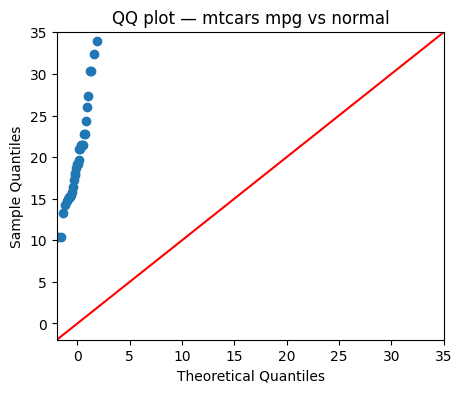

In [ ]:
# Create a new figure with specific size (5 inches wide by 4 inches tall)
fig = plt.figure(figsize=(5, 4))

# Add a subplot to the figure (1 row, 1 column, first subplot)
ax = fig.add_subplot(1, 1, 1)

# Generate a QQ plot to compare the distribution of 'mpg' with a normal distribution
# 'line="45"' adds a reference line at 45 degrees to indicate expected values if data is normal
sm.qqplot(mtcars['mpg'], line='45', ax=ax)

# Add a title to the plot for clarity
ax.set_title('QQ Plot: mtcars "mpg" vs Normal Distribution')

# Save and/or display the plot
show_and_save(fig, fname='plots/special_qq_mtcars_mpg.png')
